In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [21]:
#创造样本
def CreateSample():
    sample = np.array([[3,3],[4,3],[1,1],[4,5],[7,7],[6,2]])
    label = [1,1,-1,-1,1,1]
    return sample,label
sample,label = CreateSample()
a = np.zeros(sample.shape[0],dtype=np.int)

In [4]:
#计算Gram矩阵
def CreateGram(sample):
    gram = np.zeros((sample.shape[0],sample.shape[0]),dtype=np.int)
    for i in range(sample.shape[0]):
     for j in range(sample.shape[0]):
        gram[i][j] = np.dot(sample[i],sample[j])
    return gram        

In [5]:
#参数更新
def update(i,label):
    global a , b
    a[i] += 1
    b += label

In [6]:
#误分条件
def is_false(i,y):
    global a , b , label , G
    isfalse = True
    result = 0
    for j in range(len(a)):
        result += a[j]*label[j]*G[i][j]
    result += b
    result *= y
    if(result <= 0):
        isfalse = False
    return isfalse

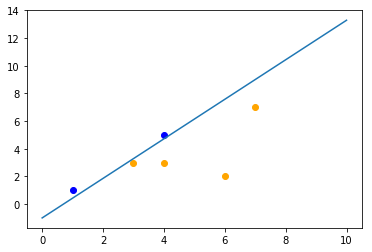

In [22]:
#主函数
def main():
    #初始化变量
    global a , b , G , label
    sample,label = CreateSample()
    type(label)
    a = np.zeros(sample.shape[0],dtype=np.int)
    G = CreateGram(sample)
    b = 0
    i = 0
    while i < sample.shape[0]:
        isfalse = is_false(i,label[i])
        if not isfalse:
            update(i,label[i])
            i = 0
        else:
            i = i + 1
    #计算权值w
    w = np.zeros_like(sample[0])
    for j in range(len(a)):
         w += a[j] * sample[j] * label[j]
    #结果图像显示
    for t in range(len(a)):
        if label[t] == 1:
            plt.plot(sample[t][0], sample[t][1], 'bo', color='orange', label='1')
        else:
            plt.plot(sample[t][0], sample[t][1], 'bo', color='blue', label='-1') 
    x = np.linspace(0,10,100)
    y = -(w[0] * x + b) / w[1]
    plt.plot(x , y)
main()